# 練習問題

In [7]:
### インポート

# 数値・確率計算
import pandas as pd
import numpy as np
import scipy.stats as stats

# PyMC
import pymc as pm
# import pytensor.tensor as pt
# import arviz as az

# 描画
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib import gridspec
import seaborn as sns


# plt.rcParams['font.family'] = 'Meiryo'

# ワーニング表示の抑制
import warnings
warnings.simplefilter('ignore')

(1) ベルヌーイ分布、カテゴリカル分布それぞれに従う乱数

$$f(k; p) = p^k(1-p)^{(1-k)}$$

$$Cat(s|\pi) = \Pi_{k=1}^{K}\pi_k^{s_k}$$

In [2]:
p = 0.3
size = 10

stats.bernoulli.rvs(p=p, size=size)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [3]:
theta = [0.1, 0.3, 0.25, 0.1, 0.25]  # 合計１、K個
K = list(range(1, len(theta)+1))
size = 10

categorical = stats.rv_discrete(values=(K, theta))

categorical.rvs(size=size)

array([3, 3, 5, 5, 2, 5, 4, 3, 2, 5])

(2) 確率分布に従う乱数生成

In [4]:
# 一様分布
a, b = 0, 1
size = 10

stats.uniform.rvs(loc=a, scale=b-a, size=size)

array([0.25807772, 0.08961799, 0.25791383, 0.1044758 , 0.88649169,
       0.11758497, 0.79772067, 0.47391302, 0.26755978, 0.6175845 ])

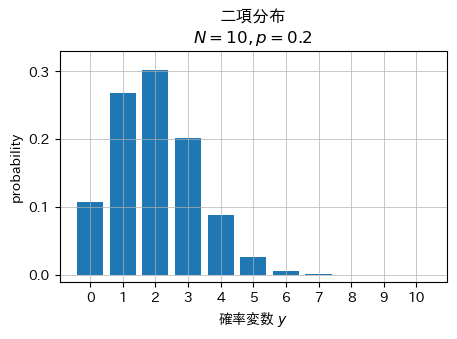

In [8]:
### 図6.3の描画

## 設定
# パラメータ
N, theta = 10, 0.2
# 線・マーカーの色
c = 'tab:blue'

## 描画用データの作成
# 確率変数yの値
yvals = range(0, 11)
# 確率変数yの値に対する確率質量関数の算出
prob = stats.binom.pmf(k=yvals, n=N, p=theta)

## 描画処理
# 描画領域の設定
plt.figure(figsize=(5, 3))
ax = plt.subplot()
# 棒グラフの描画
ax.bar(yvals, prob, color=c)
# 修飾
ax.set(title=f'二項分布\n$N={N},p={theta}$',
       xlabel='確率変数 $y$',ylabel='probability',
       xticks=yvals, ylim=(-0.01, 0.33), yticks=(0, 0.1, 0.2, 0.3))
plt.grid(lw=0.5);

In [6]:
# 二項分布
n = 8
p = 0.4
size = 10

stats.binom.rvs(n=n, p=p, size=size)

array([3, 5, 4, 4, 4, 2, 1, 4, 2, 3])

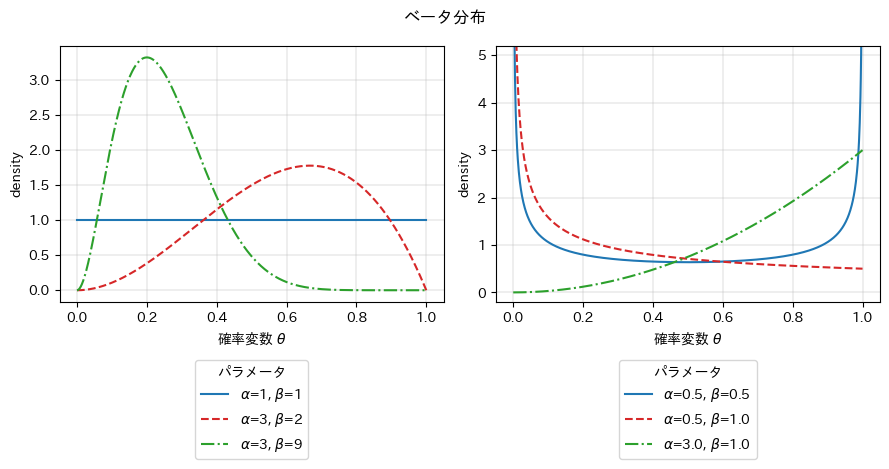

In [9]:
### 図6.4の描画

## 設定
# 色
c = ['tab:blue', 'tab:red', 'tab:green']
# 線種
ls = ['-', '--', '-.']

## 描画用データの作成
# 確率変数yの値
yvals = np.linspace(0, 1, 1001)

## 描画処理
# 描画領域の設定
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
# 左のグラフの描画
for i, (a, b) in enumerate(zip([1, 3, 3], [1, 2, 9])):
    ax1.plot(yvals,
             stats.beta.pdf(x=yvals, a=a, b=b),
             color=c[i], ls=ls[i], label=rf'$\alpha$={a}, $\beta$={b}')
    ax1.set(xlabel=r'確率変数 $\theta$', ylabel='density')
    ax1.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center',
               title='パラメータ')
    ax1.grid(lw=0.3)
# 右のグラフの描画
for i, (a, b) in enumerate(zip([0.5, 0.5, 3.0], [0.5, 1.0, 1.0])):
    ax2.plot(yvals,
             stats.beta.pdf(x=yvals, a=a, b=b),
             color=c[i], ls=ls[i], label=rf'$\alpha$={a}, $\beta$={b:.1f}')
    ax2.set(xlabel=r'確率変数 $\theta$', ylabel='density', ylim=(-0.2, 5.2))
    ax2.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center',
               title='パラメータ')
    ax2.grid(lw=0.3)
# 修飾
fig.suptitle('ベータ分布')
plt.tight_layout();

In [10]:
### 【連続】ベータ分布に従う乱数の生成

# パラメータ設定
a = 2      # a > 0
b = 1      # b > 0
size = 10  # 乱数生成数

# 乱数生成
stats.beta.rvs(a=a, b=b, size=size)

array([0.5971464 , 0.89209234, 0.9977483 , 0.57347067, 0.99810404,
       0.30919945, 0.7338799 , 0.17947591, 0.82373532, 0.87676851])

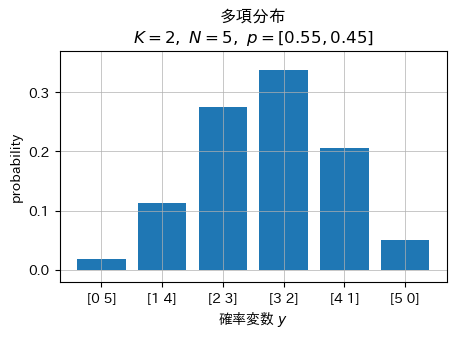

In [11]:
### 描画

## 設定
# パラメータ
N = 5
theta = [0.55, 0.45]  # K=2
# 色
c = 'tab:blue'

## 描画用データの作成
# yの算出
yvals = np.array([[i, N-i] for i in range(0, N+1)])
yvals_str = [str(yvals[i]) for i in range(len(yvals))]
# 確率質量関数の算出
prob = stats.multinomial.pmf(x=yvals, n=N, p=theta)

## 描画処理
# 描画領域の設定
plt.figure(figsize=(5, 3))
ax = plt.subplot()
# 棒グラフの描画
ax.bar(yvals_str, prob, color=c)
# 修飾
ax.set(title=f'多項分布\n$K={len(theta)},\ N={N},\ p={theta}$',
       xlabel='確率変数 $y$', ylabel='probability',
       ylim=(-0.02, 0.37), yticks=(0, 0.1, 0.2, 0.3))
plt.grid(lw=0.5);

In [12]:
### 【離散】多項分布に従う乱数の生成

# パラメータ設定
n = 5                  # 試行回数n≧0
p = [0.1, 0.6, 0.3]    # 成功確率pの配列：合計1
size = 10              # 乱数生成数

# 乱数生成
stats.multinomial.rvs(n=n, p=p, size=size)

array([[0, 2, 3],
       [1, 3, 1],
       [0, 4, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 4, 0],
       [2, 3, 0],
       [0, 3, 2],
       [0, 3, 2],
       [1, 2, 2]])